In [1]:
import pandas as pd
df=pd.read_csv('../data/cleaned/Food_Production_cleaned.csv')

In [2]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per kilogram',
       'Freshwater withdrawals per kilogram',
       'Greenhouse gas emissions per 100g protein', 'Land use per kilogram',
       'Scarcity-weighted water use per kilogram'],
      dtype='object')

In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
# QUESTION 1

# What product exhibits the highest environmental impact for all environmental markers used to measure 
#(total emissions, nitrogen leaching, freshwater withdrawal, and land use change)? 

#Is there a single product that ranks the highest across all of them?


In [5]:
import matplotlib.pyplot as plt

# List of products
products = [
    'Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal', 'Rice',
    'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar', 'Other Pulses', 'Peas',
    'Nuts', 'Groundnuts', 'Soymilk', 'Tofu', 'Soybean Oil', 'Palm Oil',
    'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil', 'Tomatoes', 'Onions & Leeks',
    'Root Vegetables', 'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
    'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
    'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton',
    'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese', 'Eggs', 'Fish (farmed)',
    'Shrimps (farmed)'
]

# Dictionary to store the product with the highest impact for each marker
highest_impact_products = {}

# Columns related to environmental markers
environmental_markers = ['Total_emissions', 'Eutrophying emissions per kilogram',
                         'Freshwater withdrawals per kilogram', 'Land use change']

# Looking at the product list and finding the highest impact for each marker
for product in products:
    product_data = df[df['Food product'] == product]
    highest_impact = {}
    for marker in environmental_markers:
        max_value = product_data[marker].max()
        highest_impact[marker] = max_value
    highest_impact_products[product] = highest_impact

# Finding the product with the highest impact across all markers
overall_highest_product = max(highest_impact_products, key=lambda x: sum(highest_impact_products[x].values()))

# Displaying the product with the highest overall impact
print(f"The product with the highest overall impact across all environmental markers is: {overall_highest_product}")



The product with the highest overall impact across all environmental markers is: Cheese


<Figure size 1200x600 with 0 Axes>

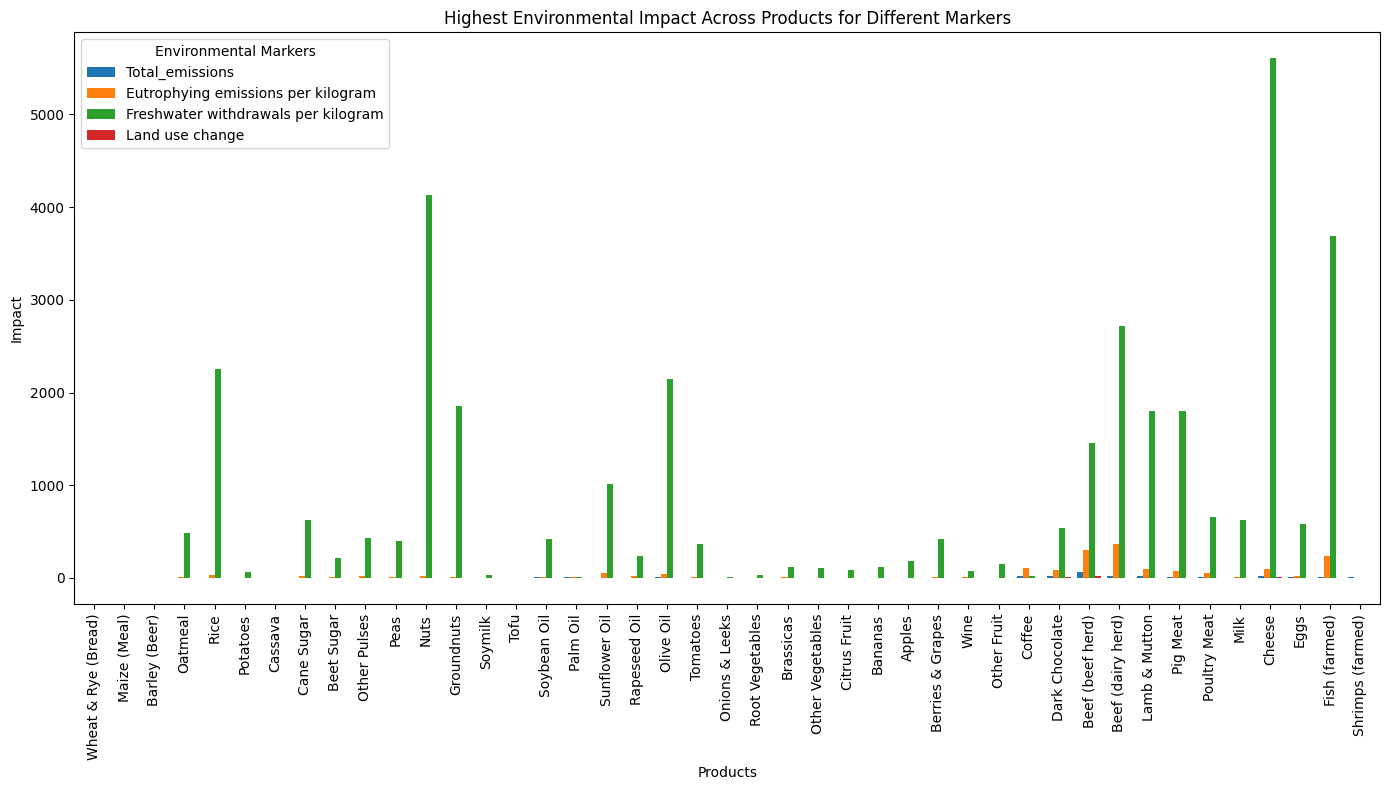

In [6]:
# Creating a DataFrame from the highest_impact_products dictionary
df_impact = pd.DataFrame(highest_impact_products).T

# Plotting a bar plot for the highest impact of each product across markers
plt.figure(figsize=(12, 6))
df_impact.plot(kind='bar', width=0.8, figsize=(14, 8))
plt.title('Highest Environmental Impact Across Products for Different Markers')
plt.xlabel('Products')
plt.ylabel('Impact')
plt.xticks(rotation=90)
plt.legend(title='Environmental Markers')
plt.tight_layout()
plt.show()


In [7]:
# EXPLANATION

#We identified the type of food product produced with the highest overall impact across all environmental markers is Cheese, followed by nuts,fish(farmed) and the variety of meat processed.Those food production used the maximum of the environmental marker the use of freshwater withdrawal per kilogram.
#The 4 environmental markers we analyzed are: total emission, nitrogen leaching (eutrophying emission per Kg), freshwater withdrawal, and land use change.
#The graph above helps to identify and pinpoint the whole listed products from our database and that helps us to create strategies to mitigate and improve in production practices.
#The countries where we want to apply this strategy to help them support their agricultura practice in a more sustainable impact. 

In [8]:
# QUESTION 2
# Which step from the food production cycle is the most carbon emissions across all food production?


# Selecting columns related to the food production cycle steps
production_steps = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']

# Calculate the total carbon emissions for each step
total_emissions_per_step = {}
for step in production_steps:
    total_emissions_per_step[step] = df[step].sum()

# Looking for the highest total carbon emissions
most_carbon_intensive_step = max(total_emissions_per_step, key=total_emissions_per_step.get)
max_emissions = total_emissions_per_step[most_carbon_intensive_step]

print(f"The most carbon-intensive step across all products is '{most_carbon_intensive_step}' "
      f"with a total of {max_emissions:.2f} emissions.")



The most carbon-intensive step across all products is 'Farm' with a total of 149.20 emissions.


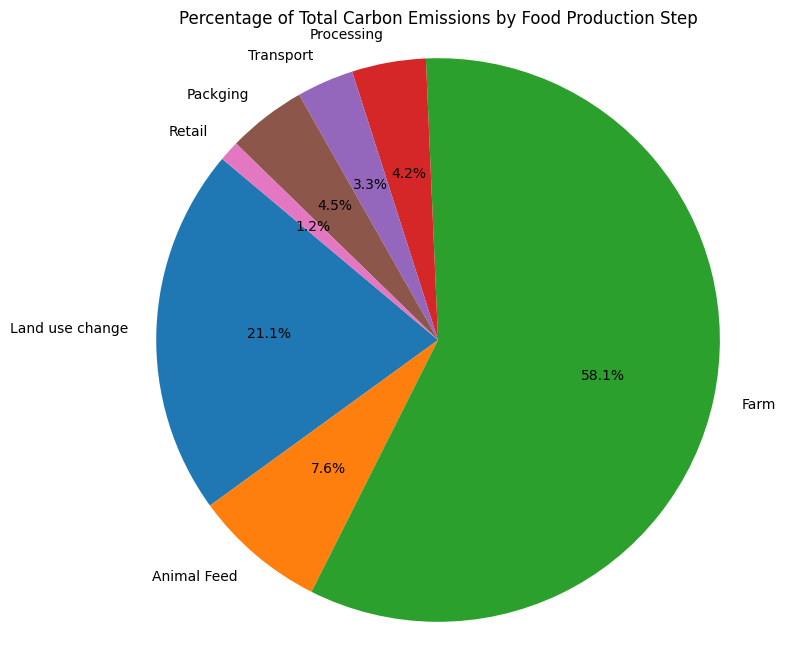

In [9]:
# Pie chart to visualize the carbon emissions for each step

plt.figure(figsize=(8, 8))
plt.pie(total_emissions_per_step.values(), labels=total_emissions_per_step.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Carbon Emissions by Food Production Step')
plt.axis('equal')
plt.show()


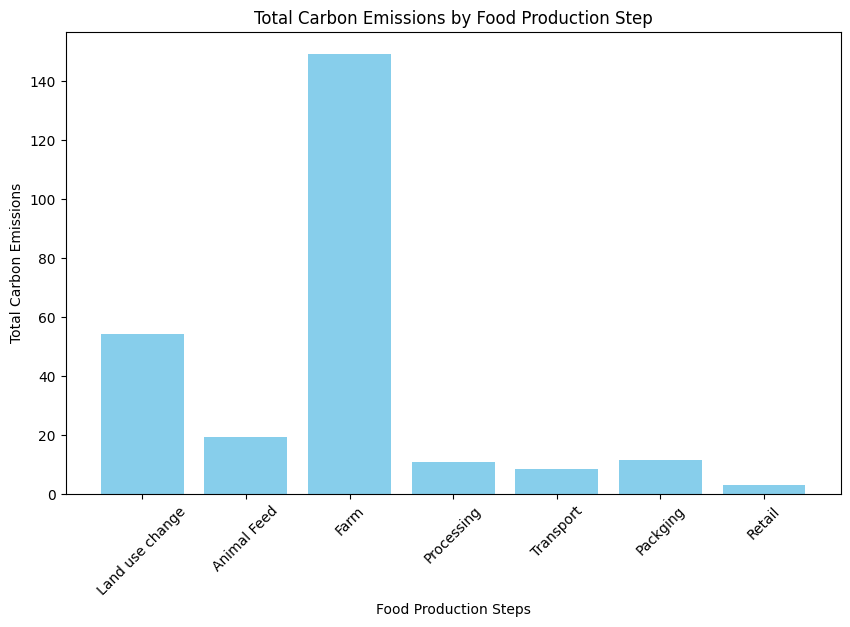

In [10]:
# bar plot to visualize the carbon emissions in Food Production

plt.figure(figsize=(10, 6))
plt.bar(total_emissions_per_step.keys(), total_emissions_per_step.values(), color='skyblue')
plt.xlabel('Food Production Steps')
plt.ylabel('Total Carbon Emissions')
plt.title('Total Carbon Emissions by Food Production Step')
plt.xticks(rotation=45)
plt.show()

In [11]:
# EXPLANATION 

#The most carbon-intensive step across all listed products is 'Farm' with a total of 149.20 emissions.
#This analysis show the various stages of the food production steps to identify which stage contributes the most to carbon emissions accross all food produciton processes. 
#This insight provides a focal point for intervention and optimize efforts within the food production process to reduce overall carbon emissions and environmental impact. 

In [12]:
#QUESTION 3

#3. Does the answer to the previous question changes if we devide products as plant and animal-based products? 
#If so, which step becomes the most carbon intensive for each group?

In [13]:
print(df['Food product'].unique())

['Wheat & Rye (Bread)' 'Maize (Meal)' 'Barley (Beer)' 'Oatmeal' 'Rice'
 'Potatoes' 'Cassava' 'Cane Sugar' 'Beet Sugar' 'Other Pulses' 'Peas'
 'Nuts' 'Groundnuts' 'Soymilk' 'Tofu' 'Soybean Oil' 'Palm Oil'
 'Sunflower Oil' 'Rapeseed Oil' 'Olive Oil' 'Tomatoes' 'Onions & Leeks'
 'Root Vegetables' 'Brassicas' 'Other Vegetables' 'Citrus Fruit' 'Bananas'
 'Apples' 'Berries & Grapes' 'Wine' 'Other Fruit' 'Coffee'
 'Dark Chocolate' 'Beef (beef herd)' 'Beef (dairy herd)' 'Lamb & Mutton'
 'Pig Meat' 'Poultry Meat' 'Milk' 'Cheese' 'Eggs' 'Fish (farmed)'
 'Shrimps (farmed)']


In [14]:
#Creating 2 more rows with an assigned value under the Food product column to store the value of the mean from all plant based and animal based products environmental impact markers. 

new_rows = pd.DataFrame({'Food product': ['Animal products', 'Plant products']})
df = pd.concat([df, new_rows], ignore_index=True)



In [32]:
# Replacing missing values NANs in the 2 new rows with the mean from animal and plant based products. 

def replace_nan_with_mean_for_rows(df):
    
    plant_mean = df.iloc[:33, 1:].mean()  

    
    animal_mean = df.iloc[33:43, 1:].mean()  

   
    df.iloc[44, 0:] = df.iloc[44, 0:].fillna(plant_mean)

   
    df.iloc[43, 0:] = df.iloc[43, 0:].fillna(animal_mean)

    return df



In [16]:
replace_nan_with_mean_for_rows(df)

#Applied the function to the dataframe

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per kilogram,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 100g protein,Land use per kilogram,Scarcity-weighted water use per kilogram
0,Wheat & Rye (Bread),0.100000,0.00,0.800000,0.200000,0.100000,0.100000,0.100000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Maize (Meal),0.300000,0.00,0.500000,0.100000,0.100000,0.100000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Barley (Beer),0.000000,0.00,0.200000,0.100000,0.000000,0.500000,0.300000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Oatmeal,0.000000,0.00,1.400000,0.000000,0.100000,0.100000,0.000000,1.600000,11.230000,482.400000,1.910000,7.600000,18786.200000
4,Rice,0.000000,0.00,3.600000,0.100000,0.100000,0.100000,0.100000,4.000000,35.070000,2248.400000,6.270000,2.800000,49576.300000
5,Potatoes,0.000000,0.00,0.200000,0.000000,0.100000,0.000000,0.000000,0.300000,3.480000,59.100000,2.710000,0.880000,2754.200000
6,Cassava,0.600000,0.00,0.200000,0.000000,0.100000,0.000000,0.000000,0.900000,0.690000,0.000000,14.670000,1.810000,0.000000
7,Cane Sugar,1.200000,0.00,0.500000,0.000000,0.800000,0.100000,0.000000,2.600000,16.920000,620.100000,0.000000,2.040000,16438.600000
8,Beet Sugar,0.000000,0.00,0.500000,0.200000,0.600000,0.100000,0.000000,1.400000,5.410000,217.700000,0.000000,1.830000,9493.300000
9,Other Pulses,0.000000,0.00,1.100000,0.000000,0.100000,0.400000,0.000000,1.600000,17.080000,435.700000,0.840000,15.570000,22477.400000


In [37]:
# fitered dataframe
rows_to_answer= [43]
filtered_df_food = df.loc[rows_to_answer]
display(filtered_df_food)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per kilogram,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 100g protein,Land use per kilogram,Scarcity-weighted water use per kilogram
43,Animal products,2.81,1.95,10.49,0.5,0.24,0.22,0.18,16.39,125.481,1892.65,13.043,88.026,63769.98


In [38]:
rows_to_answer1= [44]
filtered_df_food1 = df.loc[rows_to_answer1]
display(filtered_df_food1)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per kilogram,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 100g protein,Land use per kilogram,Scarcity-weighted water use per kilogram
44,Plant products,0.790909,0.0,1.342424,0.178788,0.181818,0.284848,0.036364,2.815152,15.107879,500.378788,7.114242,7.023939,22829.772727


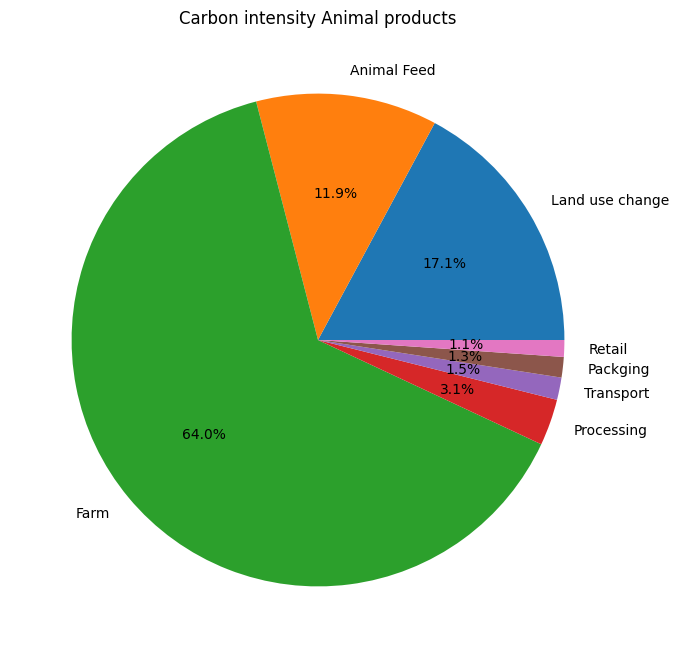

In [51]:
columns_for_pie = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
data_for_pie = filtered_df_food.loc[:, columns_for_pie]
for index, row in data_for_pie.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=columns_for_pie, autopct='%1.1f%%')
    plt.title(f'Carbon intensity Animal products')
    plt.show()



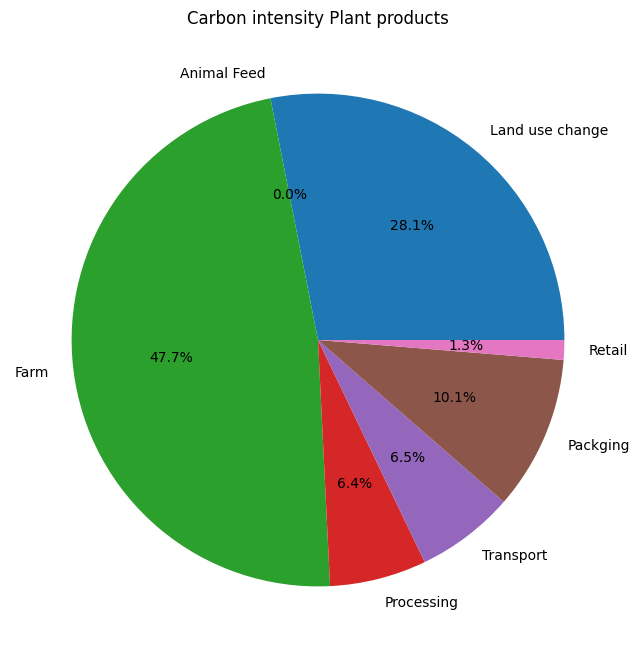

In [53]:
columns_for_pie = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
data_for_pie = filtered_df_food1.loc[:, columns_for_pie]
for index, row in data_for_pie.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=columns_for_pie, autopct='%1.1f%%')
    plt.title(f'Carbon intensity Plant products')
    plt.show()

In [19]:
#EXPLANATION
#When we divide and group products as plant and animal products we see the ost carbon-intensive step in the process is still farming for both categories, accounting for 64% of total animal products and 47,7% for plant-based products. 


In [58]:
#QUESTION 4

#4. Which of these 2 categories exhibits the highest environmental impact across all markers?
#considering only the products that the listed countries manifested as being interested in developing and considered for funding BID
#Brazil, Colombia, Costa Rica, Mexico.


In [54]:
# Filtered the dataframe to only include the rows from Food product column
listed_product_row=[11,15,16,31,32,33,34,35,36,39]
listed_product_df= df.loc[listed_product_row].reset_index(drop=True)

In [55]:
#Added 2 rows with values assigned under Food product to store the means based on productes listed.

new_rows1 = pd.DataFrame({'Food product': ['Plant products', 'Animal products']})
listed_product_df = pd.concat([listed_product_df, new_rows1], ignore_index=True)

display(listed_product_df)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per kilogram,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 100g protein,Land use per kilogram,Scarcity-weighted water use per kilogram
0,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,19.15,4133.8,0.26,12.96,229889.8
1,Soybean Oil,3.1,0.0,1.5,0.3,0.3,0.8,0.0,6.0,11.69,414.6,0.00,10.52,14888.2
2,Palm Oil,3.1,0.0,2.1,1.3,0.2,0.9,0.0,7.6,10.67,6.4,0.00,2.42,36.2
3,Coffee,3.7,0.0,10.4,0.6,0.1,1.6,0.1,16.5,110.52,25.9,35.66,21.62,337.0
4,Dark Chocolate,14.3,0.0,3.7,0.2,0.1,0.4,0.0,18.7,87.08,540.6,93.30,68.96,2879.2
5,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,301.41,1451.2,49.89,326.21,34732.5
6,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,365.29,2714.3,16.87,43.24,119805.2
7,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,97.13,1802.8,19.85,369.81,141925.0
8,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2,76.38,1795.8,7.61,17.36,66867.4
9,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,98.37,5605.2,10.82,87.79,180850.6


In [56]:
#Replacing NANs with the new mean

def replace_nan_with_mean_for_rows(df):
    
    plant_mean1 = df.iloc[0:4, 1:].mean()
    animal_mean1 = df.iloc[4:11, 1:].mean()

    
    df.iloc[10, 1:] = df.iloc[10, 1:].fillna(plant_mean1)
    df.iloc[11, 1:] = df.iloc[11, 1:].fillna(animal_mean1)

    return df


display(replace_nan_with_mean_for_rows(listed_product_df))

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per kilogram,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 100g protein,Land use per kilogram,Scarcity-weighted water use per kilogram
0,Nuts,-2.100000,0.0,2.100000,0.000000,0.100000,0.100000,0.000000,0.200000,19.150000,4133.800000,0.260000,12.960000,229889.80
1,Soybean Oil,3.100000,0.0,1.500000,0.300000,0.300000,0.800000,0.000000,6.000000,11.690000,414.600000,0.000000,10.520000,14888.20
2,Palm Oil,3.100000,0.0,2.100000,1.300000,0.200000,0.900000,0.000000,7.600000,10.670000,6.400000,0.000000,2.420000,36.20
3,Coffee,3.700000,0.0,10.400000,0.600000,0.100000,1.600000,0.100000,16.500000,110.520000,25.900000,35.660000,21.620000,337.00
4,Dark Chocolate,14.300000,0.0,3.700000,0.200000,0.100000,0.400000,0.000000,18.700000,87.080000,540.600000,93.300000,68.960000,2879.20
5,Beef (beef herd),16.300000,1.9,39.400000,1.300000,0.300000,0.200000,0.200000,59.600000,301.410000,1451.200000,49.890000,326.210000,34732.50
6,Beef (dairy herd),0.900000,2.5,15.700000,1.100000,0.400000,0.300000,0.200000,21.100000,365.290000,2714.300000,16.870000,43.240000,119805.20
7,Lamb & Mutton,0.500000,2.4,19.500000,1.100000,0.500000,0.300000,0.200000,24.500000,97.130000,1802.800000,19.850000,369.810000,141925.00
8,Pig Meat,1.500000,2.9,1.700000,0.300000,0.300000,0.300000,0.200000,7.200000,76.380000,1795.800000,7.610000,17.360000,66867.40
9,Cheese,4.500000,2.3,13.100000,0.700000,0.100000,0.200000,0.300000,21.200000,98.370000,5605.200000,10.820000,87.790000,180850.60


In [ ]:
#EXPLANATION
#Animal products still exhibit a greater impact across all environmental impact markers. We will analyse this again, but only for the products listed.

#After analysing the data for the listed products, we see that, even though the differences are not as dramatic, animal products stil have a greater environmental impact across all markers.

In [ ]:
# Pending to add stacked barplot for visualization


In [ ]:
#QUESTION 5

#5. Based in the water-scarcity information available, what agricultural projects would we advise the BID (Inter American development bank) to finance (funding) in our listed countries?

In [24]:
# Keeping columns food product and freshwater withdrawals per kilogram.

columns_to_keep = ['Food product', 'Freshwater withdrawals per kilogram']
last_quest_df = listed_product_df[columns_to_keep]
display(last_quest_df)

,Food product,Freshwater withdrawals per kilogram
0,Nuts,4133.800000
1,Soybean Oil,414.600000
2,Palm Oil,6.400000
3,Coffee,25.900000
4,Dark Chocolate,540.600000
5,Beef (beef herd),1451.200000
6,Beef (dairy herd),2714.300000
7,Lamb & Mutton,1802.800000
8,Pig Meat,1795.800000
9,Cheese,5605.200000


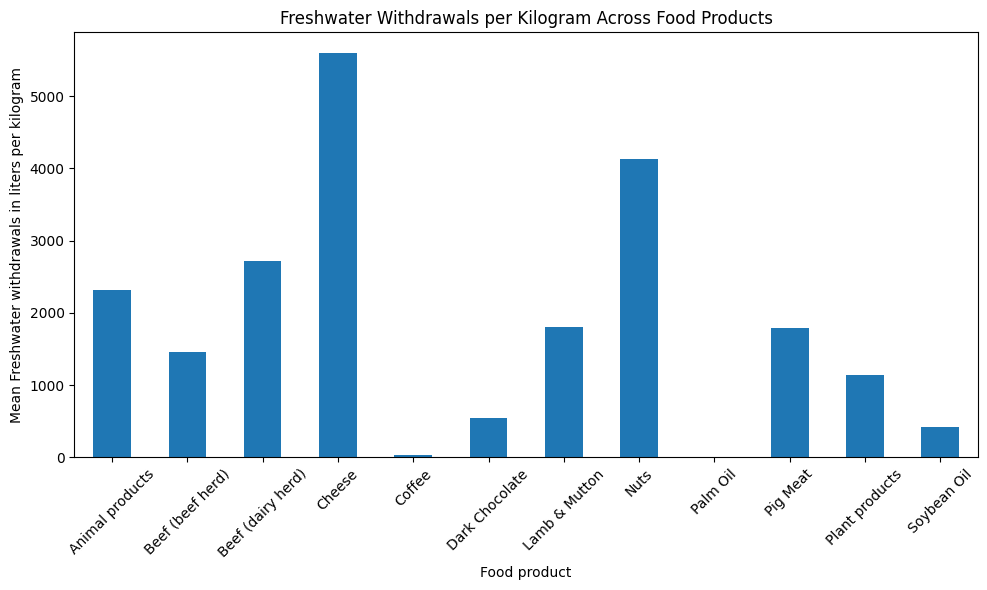

In [59]:
# Creating chartplot to visualize the Average Freshwater Withdrawals per Kilogram Across Food Products

plt.figure(figsize=(10, 6))  


grouped_data = last_quest_df.groupby('Food product')['Freshwater withdrawals per kilogram'].mean()

grouped_data.plot(kind='bar')
plt.xlabel('Food product')
plt.ylabel('Mean Freshwater withdrawals in liters per kilogram')
plt.title('Freshwater Withdrawals per Kilogram Across Food Products')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [28]:
#Importing cleaned dataframe containing the water scarcity inforamtion. 

water_df = pd.read_csv('../data/cleaned/freshwater-withdrawals-as-a-share-of-internal-resources.csv')
display(water_df)

,Country,Code,Year,water_stress_level
0,Brazil,BRA,2000,2.65
1,Brazil,BRA,2001,2.67
2,Brazil,BRA,2002,2.68
3,Brazil,BRA,2003,2.70
4,Brazil,BRA,2004,2.71
...,...,...,...,...
67,Mexico,MEX,2016,32.48
68,Mexico,MEX,2017,32.95
69,Mexico,MEX,2018,44.46
70,Mexico,MEX,2019,44.72


In [29]:
#Filtering the dataframe to select the most up-to-date values

water_df = water_df[water_df['Year'] == 2020]

In [30]:
display(water_df)

,Country,Code,Year,water_stress_level
20,Brazil,BRA,2020,1.48
41,Colombia,COL,2020,4.36
50,Costa Rica,CRI,2020,5.35
71,Mexico,MEX,2020,44.82


In [31]:
#EXPLANATION

#Considering the water stress levels and Freshwater withdrawals per kilogram for our listed countries Brazil, Colombia, Costa Rica, Mexico:
#If we only had to consider the water footprint of each product, we would advise the BID to exclude from finance al projects
#that are projecting to work with nuts, beef and cheese production unless the country is not water stressed, such as Colombia, Costa Rica and Brazil.
#These 3 countries, according to our analysis, are elegible to receive funding for projects working with any of the listed products.
#On the other hand, we advise the BID to not fund any projects working with nuts, beef and cheese in Mexico.
#This is but a macro view, and our recommendation would be to gather and analyse water stress data at the local level, so we can
#elaborate more accurate advise based on the actual regional characteristics.
